# Feature Engineering for Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import datetime
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [3]:
za_data = pd.read_csv("Classification/all_files_ZAv1.csv")

In [4]:
za_data.columns

Index(['trackAppearanceCount', 'artistAppearanceCount', 'artist_names',
       'track_name', 'rank', 'uri', 'source', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'End Date', 'Week', 'Year', 'End Date Dt',
       'Seconds since Epoch', 'End Date Aggregated', 'ArtistCount',
       'main_artist', 'isTopTen', 'Artist and Track', 'rank difference',
       'Position over Time', 'IsGirlGroup', 'IsBoyGroup'],
      dtype='object')

In [5]:
len(list(za_data.columns))

25

In [6]:
za_data["End Date Dt"] = za_data["End Date Dt"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [7]:
za_data.shape

(70686, 25)

In [8]:
za_data_test = za_data[za_data['End Date Dt'] > datetime(2023, 5, 31)]

za_data_test_first_time = za_data_test[za_data_test["trackAppearanceCount"] == 0]
za_data_test_first_time_df = za_data_test_first_time[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]


za_data_test = za_data_test[za_data_test["trackAppearanceCount"] != 0]
za_data = za_data[za_data['End Date Dt'] <= datetime(2023, 5, 31)]

In [9]:
za_data_df = za_data[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]
za_data_test_df = za_data_test[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]

In [10]:
# za_data["End Date"].unique().tolist()

In [11]:
za_data_test_first_time_df

,main_artist,track_name,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference
0,$,BACK TO ME,0,0,38,38,-1,1,133735,1,0,0
2,$,BEG FORGIVENESS,0,2,74,74,-1,1,95997,1,0,0
3,$,BURN,0,3,79,79,-1,1,91850,1,0,0
6,$,CARNIVAL,0,6,14,14,-1,1,203139,1,0,0
7,$,CARNIVAL,0,22,12,12,14,2,223967,1,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
70109,Zee Nxumalo,Thula Mabota,0,0,23,23,-1,1,197091,1,0,0
70162,Zoli White Smoke,Re Hwela Eng,0,0,183,183,-1,1,92034,1,0,0
70172,Zoli White Smoke,Re Pluggeng,0,10,160,160,-1,1,109800,1,0,0
70185,Zwide,Wenhliziyo Yami,0,0,64,64,-1,1,103484,1,0,0


In [12]:
groupby_cols = ['main_artist', 'track_name']

In [13]:
za_data_test_first_time

,trackAppearanceCount,artistAppearanceCount,artist_names,track_name,rank,uri,source,peak_rank,previous_rank,weeks_on_chart,...,Seconds since Epoch,End Date Aggregated,ArtistCount,main_artist,isTopTen,Artist and Track,rank difference,Position over Time,IsGirlGroup,IsBoyGroup
0,0,0,"$, Kanye West, Ty Dolla $ign",BACK TO ME,38,spotify:track:1icgLGTpX2fQXKRe4D7w2b,Ye,38,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BACK TO ME",0,0,False,False
2,0,2,"$, Kanye West, Ty Dolla $ign",BEG FORGIVENESS,74,spotify:track:4ihV1wv7QmjbkLHaT9lA4s,Ye,74,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BEG FORGIVENESS",0,0,False,False
3,0,3,"$, Kanye West, Ty Dolla $ign",BURN,79,spotify:track:04CyMEHliadfQWMUJb1w99,Ye,79,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BURN",0,0,False,False
6,0,6,"$, Kanye West, Ty Dolla $ign",CARNIVAL,14,spotify:track:3w0w2T288dec0mgeZZqoNN,Ye,14,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; CARNIVAL",0,0,False,False
7,0,22,"$, Kanye West, Ty Dolla $ign, Rich The Kid, Pl...",CARNIVAL,12,spotify:track:3w0w2T288dec0mgeZZqoNN,Ye,12,14,2,...,1.708560e+09,2024-02-01,1,$,1,"$, Kanye West, Ty Dolla $ign, Rich The Kid, Pl...",-2,75,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70109,0,0,"Zee Nxumalo, Pabi Cooper, 031CHOPPA, Shakes & Les",Thula Mabota,23,spotify:track:4xXHrIiIeW7dMh5FoYI5m1,KwaNxumalo,23,-1,1,...,1.712189e+09,2024-04-01,1,Zee Nxumalo,0,"Zee Nxumalo, Pabi Cooper, 031CHOPPA, Shakes & ...",0,0,False,False
70162,0,0,"Zoli White Smoke, SmeezyOn The Beat, Kharishma",Re Hwela Eng,183,spotify:track:67usqaeLDTKzzTVCIM84Xe,5542405 Records DK,183,-1,1,...,1.729123e+09,2024-10-01,1,Zoli White Smoke,0,"Zoli White Smoke, SmeezyOn The Beat, Kharishma...",0,0,False,False
70172,0,10,"Zoli White Smoke, SmeezyOn The Beat, Tribby Wa...",Re Pluggeng,160,spotify:track:6vSTXKCmQybvAjQwRB8aHa,5542405 Records DK,160,-1,1,...,1.734566e+09,2024-12-01,1,Zoli White Smoke,0,"Zoli White Smoke, SmeezyOn The Beat, Tribby Wa...",0,0,False,False
70185,0,0,"Zwide, Umafikizolo, uMehlabomvu",Wenhliziyo Yami,64,spotify:track:1tvDDR0ZAowEqKLN15g7tH,6551244 Records DK,64,-1,1,...,1.709165e+09,2024-02-01,1,Zwide,0,"Zwide, Umafikizolo, uMehlabomvu; Wenhliziyo Yami",0,0,False,False


### 0. Entry Position into Chart

In [15]:
def findingtheentrypos(za_data):
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("min")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Start Date"]
    
    groupednum_songs_df = groupednum_songs_df.drop_duplicates()
    groupednum_songs_df.shape
    
    groupednum_songs_ls = groupednum_songs_df.values.tolist()
    
    thefirstones = []
    for artsongls in groupednum_songs_ls:
        theartist = artsongls[0]
        thetrack = artsongls[1]
        thestartdate = artsongls[2]
        thefirstones.append(za_data[(za_data["main_artist"] == theartist) & (za_data["track_name"] == thetrack) & (za_data["End Date"] == thestartdate)])
        
    first_track_position_df = pd.concat(thefirstones)
    
    first_track_position_df_relevant = first_track_position_df[["main_artist", "track_name", "rank", "End Date"]]
    first_track_position_df_relevant.columns = ["main_artist", "track_name", "entry rank", "End Date"]
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("count")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Count"]
    
    return groupednum_songs_df, first_track_position_df_relevant

### 1. Streams

In [17]:
def findtheMinMaxMeanStreams(za_data):
    groupedmax_streams = za_data.groupby(groupby_cols)["streams"].agg("max")
    groupedmax_streams_df = pd.DataFrame(groupedmax_streams).reset_index()
    groupedmax_streams_df.columns = groupby_cols + ["Max Streams per Song"]
    
    groupedmin_streams = za_data.groupby(groupby_cols)["streams"].agg("min")
    groupedmin_streams_df = pd.DataFrame(groupedmin_streams).reset_index()
    groupedmin_streams_df.columns = groupby_cols + ["Min Streams per Song"]
    
    groupedsum_streams = za_data.groupby(groupby_cols)["streams"].agg("sum")
    groupedsum_streams_df = pd.DataFrame(groupedsum_streams).reset_index()
    groupedsum_streams_df.columns = groupby_cols + ["Total Streams per Song"]

    groupedmean_streams = za_data.groupby(groupby_cols)["streams"].agg("mean")
    groupedmean_streams_df = pd.DataFrame(groupedmean_streams).reset_index()
    groupedmean_streams_df.columns = groupby_cols + ["Mean Streams per Song"]
    
    return groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df

### 2. Positions

In [19]:
def findtheMinMaxPositions(za_data):
    groupedpos_streams = za_data.groupby(groupby_cols)["rank"].agg("min")
    groupedpos_streams_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedpos_streams_df.columns = groupby_cols + ["Min Position per Song"]

    groupedposmax_streams = za_data.groupby(groupby_cols)["rank"].agg("max")
    groupedposmax_streams_df = pd.DataFrame(groupedposmax_streams).reset_index()
    groupedposmax_streams_df.columns = groupby_cols + ["Max Position per Song"]
    
    return groupedpos_streams_df, groupedposmax_streams_df

### Number of songs per artist

In [21]:
def findtheMaxArtistAppearanceTimes(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["artistAppearanceCount"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Artist Appearance"]
    
    return groupedmin_songs_df

#### Maximum number of times an artist has appeared on the chart

In [23]:
def findtheMinMaxNumofSongs(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["Artist Song Count"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Song Count per artist"]
    
    return groupedmin_songs_df

#### Number of weeks a song spent on the chart per artist

In [25]:
def findtheWeeksonChartperSong(za_data):
    
    groupedpos_streams = za_data.groupby(groupby_cols)["weeks_on_chart"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = groupby_cols + ["Max Weeks on Chart per song"]
    
    return groupedmin_songs_df

#### First week streams and first week positions

In [27]:
def findthePosonWeeksonChartperSong(za_data):
    
    za_data_first_time = za_data[za_data["trackAppearanceCount"] == 0]
    za_data_first_time_df = za_data_first_time[['main_artist', 'track_name', "rank", 'streams']]
    za_data_first_time_df.columns = ['main_artist', 'track_name', "first_week_rank", 'first_week_streams']
    
    return za_data_first_time_df

### 3. Dates

## Combine the dfs

In [30]:
def combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df):
    groupeddf = groupedmax_streams_df
    
    groupeddf["Min Streams per Song"] = groupedmin_streams_df["Min Streams per Song"]
    groupeddf["Total Streams per Song"] = groupedsum_streams_df["Total Streams per Song"]
    groupeddf["Mean Streams per Song"]= groupedmean_streams_df["Mean Streams per Song"]
    groupeddf["Min Position per Song"] = groupedpos_streams_df["Min Position per Song"]
    groupeddf["Max Position per Song"] = groupedposmax_streams_df["Max Position per Song"]
    groupeddf["Artist Song Count"] = groupednum_songs_df["Artist Song Count"]
    
    groupeddf["MaxMin Difference Position"] = groupeddf["Max Position per Song"] - groupeddf["Min Position per Song"]
    groupeddf["MaxMin Difference Streams"] = groupeddf["Max Streams per Song"] - groupeddf["Min Streams per Song"]
    
    groupeddf["MaxMin Ratio Position"] = groupeddf["Max Position per Song"] / groupeddf["Min Position per Song"]
    groupeddf["MaxMin Ratio Streams"] = groupeddf["Max Streams per Song"] / groupeddf["Min Streams per Song"]
    
    groupeddf.drop(["Max Position per Song"], inplace=True, axis=1)
    
    groupeddf_startpos = groupeddf.merge(first_track_position_df_relevant[["main_artist", "track_name", "entry rank"]], left_on=["main_artist", "track_name"], right_on=["main_artist", "track_name"], how="inner")
    
    groupeddf_startpos["main_art_track"] = groupeddf_startpos["main_artist"] + groupeddf_startpos["track_name"]
    
    groupeddf_startpos_regress = groupeddf_startpos[['main_artist', "main_art_track", 'entry rank', 'Min Position per Song']].drop_duplicates()
    
    return groupeddf, groupeddf_startpos_regress
    

In [31]:
some_artists_of_interest = ["6LACK", "9umba", "BNXN fka Buju", "Black Coffee", "Big Zulu"]
groupednum_songs_df, first_track_position_df_relevant = findingtheentrypos(za_data)
groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df = findtheMinMaxMeanStreams(za_data)
groupedpos_streams_df, groupedposmax_streams_df = findtheMinMaxPositions(za_data)
groupeddf, groupeddf_startpos_regress = combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df)
filenname = "zaall"

In [32]:
groupby_cols

['main_artist', 'track_name']

In [33]:
maxsongperartistdf = findtheMinMaxNumofSongs(groupeddf)

In [34]:
weeksonchartpersong = findtheWeeksonChartperSong(za_data)

In [35]:
firstweekstreamsandrank = findthePosonWeeksonChartperSong(za_data)

In [36]:
maxartistappearances = findtheMaxArtistAppearanceTimes(za_data)

In [37]:
fingroupeddf = groupeddf.merge(maxsongperartistdf, left_on=["main_artist"], right_on=["main_artist"], how="inner")
fingroupeddf = fingroupeddf.drop(["Artist Song Count"],axis=1)

In [38]:
fingroupeddf = fingroupeddf.merge(weeksonchartpersong, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [39]:
fingroupeddf = fingroupeddf.merge(firstweekstreamsandrank, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [40]:
fingroupeddf = fingroupeddf.merge(maxartistappearances, left_on=["main_artist"], right_on=["main_artist"], how="inner")

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(za_data["source"])

za_encoded_source = le.transform(za_data["source"])
za_data["encoded_source"] = za_encoded_source
zarelevantsource = za_data[["main_artist", "track_name", "encoded_source"]]
zarelevantsource = zarelevantsource.drop_duplicates()

In [42]:
fingroupeddf = fingroupeddf.merge(zarelevantsource, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [43]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [44]:
fingroupeddf.to_csv("Classification/cleanedartistsong.csv", index=False)

##### LINEAR REGRESSION NUMBER OF WEEKS

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
fingroupeddf = fingroupeddf.reset_index()
fingroupeddf = fingroupeddf.drop(["index"], axis=1)

In [49]:
fingroupeddf.shape

(4631, 17)

In [50]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [51]:
X = fingroupeddf.drop(["main_artist", "track_name", "Max Weeks on Chart per song", 'Max Artist Appearance'], axis=1)
# X = X[['first_week_rank', 'first_week_streams','Total Streams per Song', 'Min Position per Song', 'MaxMin Difference Position', 'MaxMin Ratio Position', 'MaxMin Ratio Streams']]
# X = X[['MaxMin Difference Position', 'MaxMin Ratio Streams', "first_week_streams"]]
y = fingroupeddf["Max Weeks on Chart per song"]

In [52]:
thecols = list(X.columns)

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
X = pd.DataFrame(X)

In [55]:
X.columns = thecols

In [56]:
X

,Max Streams per Song,Min Streams per Song,Total Streams per Song,Mean Streams per Song,Min Position per Song,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Max Song Count per artist,first_week_rank,first_week_streams,encoded_source
0,-0.331234,0.186282,-0.404976,-0.132425,1.837073,-1.055797,-0.502720,-0.304818,-0.476282,-0.985745,1.478325,-0.205705,-1.634947
1,-0.340682,0.162576,-0.405487,-0.149479,1.635373,-1.055797,-0.502720,-0.304818,-0.476282,-0.985745,1.283677,-0.216648,-0.581670
2,-0.074403,0.830760,-0.391083,0.331191,0.727723,-1.055797,-0.502720,-0.304818,-0.476282,-0.985745,0.407764,0.091806,-1.721281
3,-0.706496,-0.862799,-0.395559,-0.863738,-0.112693,0.181835,-0.449644,-0.262327,-0.277380,-0.884700,-0.403267,-0.640404,-0.939957
4,-0.652890,-0.620862,-0.422376,-0.713059,1.063890,-1.055797,-0.502720,-0.304818,-0.476282,-0.884700,0.732176,-0.578308,-0.564403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,-0.195027,0.252217,-0.172410,0.045276,1.131123,-0.365026,-0.366421,-0.292648,-0.395407,-0.867859,1.007927,-0.073255,-0.089565
4627,-0.215335,-0.219115,-0.140038,-0.225793,-0.532901,0.858216,-0.158719,-0.208109,-0.159433,-0.800495,0.067131,-0.298141,-0.452169
4628,-0.484987,-0.200489,-0.394493,-0.410313,1.870689,-1.041406,-0.502249,-0.304622,-0.475858,-0.968904,1.510766,-0.383811,1.391066
4629,-0.272040,0.334821,-0.401774,-0.025571,1.887498,-1.055797,-0.502720,-0.304818,-0.476282,-0.867859,1.526987,-0.137135,0.121954


In [57]:
X_train = X.head(4000)
y_train = y.head(4000)

X_test = X.iloc[4001:]
y_test = y.iloc[4001:]

# X_train = X.head(1800)
# y_train = y.head(1800)

# X_test = X.iloc[1801:]
# y_test = y.iloc[1801:]

In [58]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.8063589553136903
[ -3.37836758   6.20669559  20.79203385 -10.37708618  -2.35338262
   5.26662309  -7.25532603   0.47412005   6.54270159   1.45583625
   2.77566573   4.65409221   0.30083115]
12.407563418712195


In [59]:
all_preds = reg.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.79


In [60]:
mae = mean_absolute_error(y_test, all_preds)

In [61]:
mae

5.5563417836198665

In [62]:
truepreds.shape[0], fintruepeds.shape[0], all_preds.shape[0]

(81, 289, 630)

In [63]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(12.857142857142856, 45.87301587301587)

In [64]:
# X[["first_week_rank", "first_week_streams"]] - 7 , 1.26%
# ["first_week_rank", "first_week_streams", "Max Streams per Song"] - 15 , 2.69%
# [all] - 48 , 8.62%
# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song"]] - 28 , 5.02%

# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song", 'Max Song Count per artist']] - 37, 6.64% 

# X[["Mean Streams per Song", "first_week_rank"]]- 8 , 1.44%

# ["MaxMin Ratio Position", "first_week_rank", "Max Song Count per artist" - 7 , 1.26%

In [65]:
from sklearn import linear_model
reglinear_model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reglinear_modelvf = reglinear_model.fit(X_train, y_train)

In [66]:
all_preds = reglinear_modelvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

In [67]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.79


In [68]:
mae = mean_absolute_error(y_test, all_preds)
mae

5.566393571653642

In [69]:
truepreds.shape[0], fintruepeds.shape[0]

(84, 287)

In [70]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(13.333333333333334, 45.55555555555556)

In [71]:
bayesianreg = linear_model.BayesianRidge()
bayesianregvf = bayesianreg.fit(X_train, y_train)

all_preds = bayesianregvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

truepreds.shape[0], fintruepeds.shape[0]

(82, 288)

In [72]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.79


In [73]:
mae = mean_absolute_error(y_test, all_preds)
mae

5.558045415834288

In [74]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(13.015873015873018, 45.714285714285715)

Feature: 0, Score: -3.37837
Feature: 1, Score: 6.20670
Feature: 2, Score: 20.79203
Feature: 3, Score: -10.37709
Feature: 4, Score: -2.35338
Feature: 5, Score: 5.26662
Feature: 6, Score: -7.25533
Feature: 7, Score: 0.47412
Feature: 8, Score: 6.54270
Feature: 9, Score: 1.45584
Feature: 10, Score: 2.77567
Feature: 11, Score: 4.65409
Feature: 12, Score: 0.30083


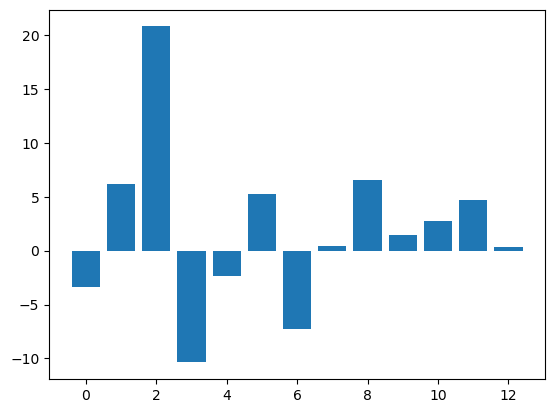

In [75]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()